In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
#loading PCA dataset from saved data folder
df = pd.read_pickle('saved_data/df_ready.pkl')

In [3]:
#splitting the data
x = df.drop(columns='num')
y = df['num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

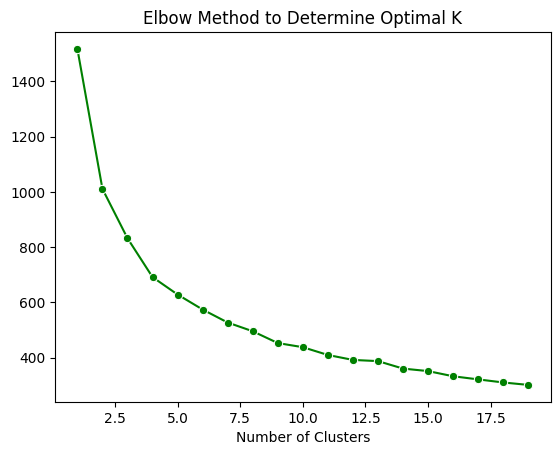

In [4]:
#Elbow method
iner = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    iner.append(kmeans.inertia_)
sns.lineplot(x=list(range(1, 20)), y=iner, marker="o", color="green")
plt.xlabel('Number of Clusters')
plt.title('Elbow Method to Determine Optimal K')
plt.show()
#best number of clusters is 10 from graph

In [5]:
#training models
#K-Means Clustering
K=10 #from graph above
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans_labels = kmeans.fit_predict(x)
#Hierarchical Clustering
agg = AgglomerativeClustering(n_clusters=K, linkage='ward')
agg_labels = agg.fit_predict(x)

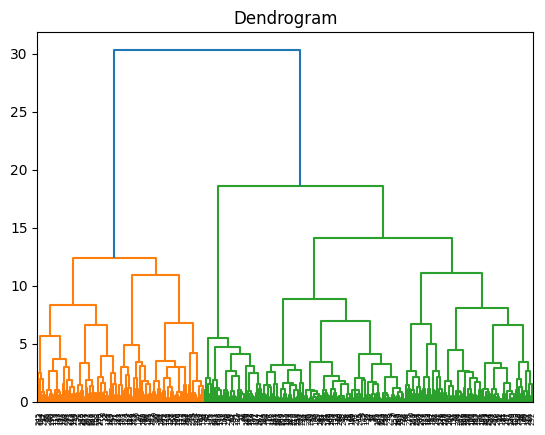

In [6]:
#dendrogram visualized
linked = linkage(x, method='ward')
dendrogram(linked, truncate_mode='level', p=30)
plt.title("Dendrogram")
plt.show()

In [7]:
#mapping clusters (0-9) to (0-1) to better classification results
def map_clusters(pred_labels):
    cluster_to_label = {}
    for cluster in set(pred_labels):
        labels = [y[i] for i in range(len(y)) if pred_labels[i] == cluster]
        cluster_to_label[cluster] = max(set(labels), key=labels.count)
    y_pred_mapped = [cluster_to_label[c] for c in pred_labels]
    return y_pred_mapped
kmeans_mapped_labels = map_clusters(kmeans_labels)
agg_mapped_labels = map_clusters(agg_labels)

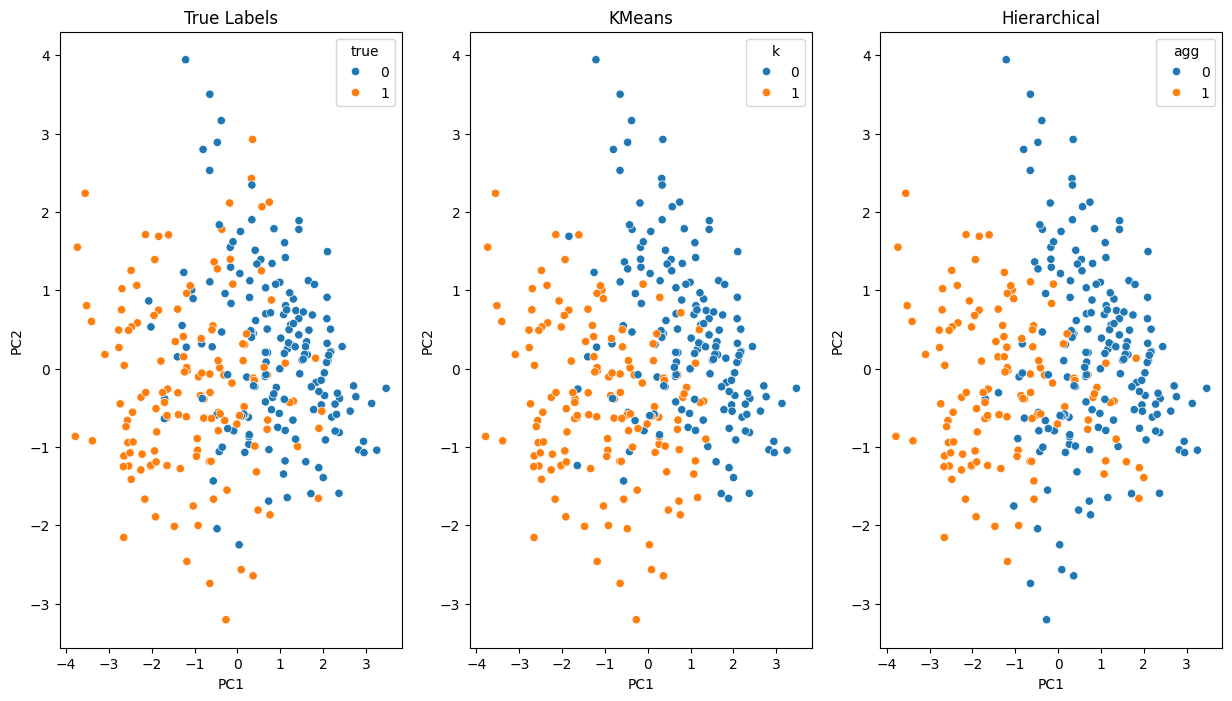

In [8]:
# Plot clusters and truth labels
pca = PCA(n_components=2)
x_2 = pca.fit_transform(x)
df = pd.DataFrame(x_2, columns=["PC1", "PC2"])
df["true"] = y
df["k"] = kmeans_mapped_labels
df["agg"] = agg_mapped_labels
fig, axes = plt.subplots(1, 3,figsize = (15,8))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="true", ax=axes[0])
axes[0].set_title("True Labels")
sns.scatterplot(data=df, x="PC1", y="PC2", hue="k", ax=axes[1])
axes[1].set_title("KMeans")
sns.scatterplot(data=df, x="PC1", y="PC2", hue="agg", ax=axes[2])
axes[2].set_title("Hierarchical")
plt.show()

In [9]:
#saving models
with open(f"saved_models/kmeans_model.pkl", 'wb') as f:
    pickle.dump(kmeans, f)
with open(f"saved_models/hierarchical_model.pkl", 'wb') as f:
    pickle.dump(agg, f)